# Anomalies detection

In [14]:
%matplotlib inline 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
plt.style.use('fivethirtyeight')

In [6]:
# get data frame
global_data = pd.read_csv('egc2024/timeseries/global.csv')
global_data

,Unnamed: 0,year,month,day,total_fee,total_received_satoshi,total_sent_satoshi,mean_fee_satoshi,mean_feeUSD,mean_fee_for100,nb_transactions,nb_payments,mean_nb_inputs,mean_nb_outputs,nb_mining,total_mining_satoshi,newly_created_coins,self_spent_satoshi,total_received,volume_without_self
0,2015-01-01,2015,1,1,801373971,45473028339385,45058028339385,13609.829337,4.284054e+06,0.799999,58882,161194,2.595241,2.737577,166,415801373971,415000000000,2757774885900,45473028339385,42715253453485
1,2015-01-02,2015,1,2,1159934218,73370568521080,72955568521080,14978.682808,4.732406e+06,0.778933,77439,257633,2.715557,3.326915,166,416159934218,415000000000,4316724676318,73370568521080,69053843844762
2,2015-01-03,2015,1,3,1196476043,82635189454578,82220189454578,14304.385766,4.086009e+06,0.797419,83644,295618,2.781885,3.534240,166,416196476043,415000000000,5584584356557,82635189454578,77050605098021
3,2015-01-04,2015,1,4,2159195328,115159442449532,114726942449532,25138.199015,6.619757e+06,0.899054,85893,280288,2.770133,3.263223,173,434659195328,432500000000,6554587956125,115159442449532,108604854493407
4,2015-01-05,2015,1,5,1608443040,112439228285641,112051728285641,16955.609622,4.662858e+06,0.898594,94862,286552,2.954471,3.020725,155,389108443040,387500000000,5063695492444,112439228285641,107375532793197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,2017-06-26,2017,6,26,35993152232,375012739382430,374842739382430,145080.443192,3.520181e+08,2.771988,248091,626222,2.565329,2.524163,136,205993152232,170000000000,14151200557043,375012739382430,360861538825387
908,2017-06-27,2017,6,27,38384859820,287624055555912,287452805555912,142346.452989,3.601857e+08,3.044288,269658,747924,2.314862,2.773602,137,209634859820,171250000000,19821969138631,287624055555912,267802086417281
909,2017-06-28,2017,6,28,38663204682,282904720130478,282717220130478,140744.451983,3.606988e+08,2.884102,274705,686018,2.471178,2.497290,150,226163204682,187500000000,10958737629631,282904720130478,271945982500847
910,2017-06-29,2017,6,29,33153365173,317698686929569,317543686929569,144453.442667,3.669758e+08,2.760877,229509,570680,2.451838,2.486526,124,188153365173,155000000000,16909883109542,317698686929569,300788803820027


In [7]:
# removing unecessary data
global_data = global_data.drop(['year',	'month', 'day', 'total_received_satoshi', 'total_fee', 'total_sent_satoshi', 'mean_fee_satoshi', 'mean_feeUSD', 'mean_fee_for100', 'nb_payments', 'mean_nb_inputs', 'mean_nb_outputs', 'nb_mining', 'newly_created_coins', 'self_spent_satoshi', 'total_received', 'volume_without_self'], axis=1)
global_data = global_data.rename(columns={ global_data.columns[0]: "date" })
global_data['date'] = pd.to_datetime(global_data['date'])
global_data

,date,nb_transactions,total_mining_satoshi
0,2015-01-01,58882,415801373971
1,2015-01-02,77439,416159934218
2,2015-01-03,83644,416196476043
3,2015-01-04,85893,434659195328
4,2015-01-05,94862,389108443040
...,...,...,...
907,2017-06-26,248091,205993152232
908,2017-06-27,269658,209634859820
909,2017-06-28,274705,226163204682
910,2017-06-29,229509,188153365173


In [8]:
# get the overview of our data
global_data.describe()

,nb_transactions,total_mining_satoshi
count,912.000000,9.120000e+02
mean,197946.012061,3.097439e+11
std,72578.218717,8.976175e+10
min,58882.000000,1.501451e+11
25%,125391.000000,2.097130e+11
50%,208736.500000,3.453659e+11
75%,248158.250000,3.826720e+11
max,375231.000000,5.335712e+11


<Axes: xlabel='total_mining_satoshi', ylabel='Density'>

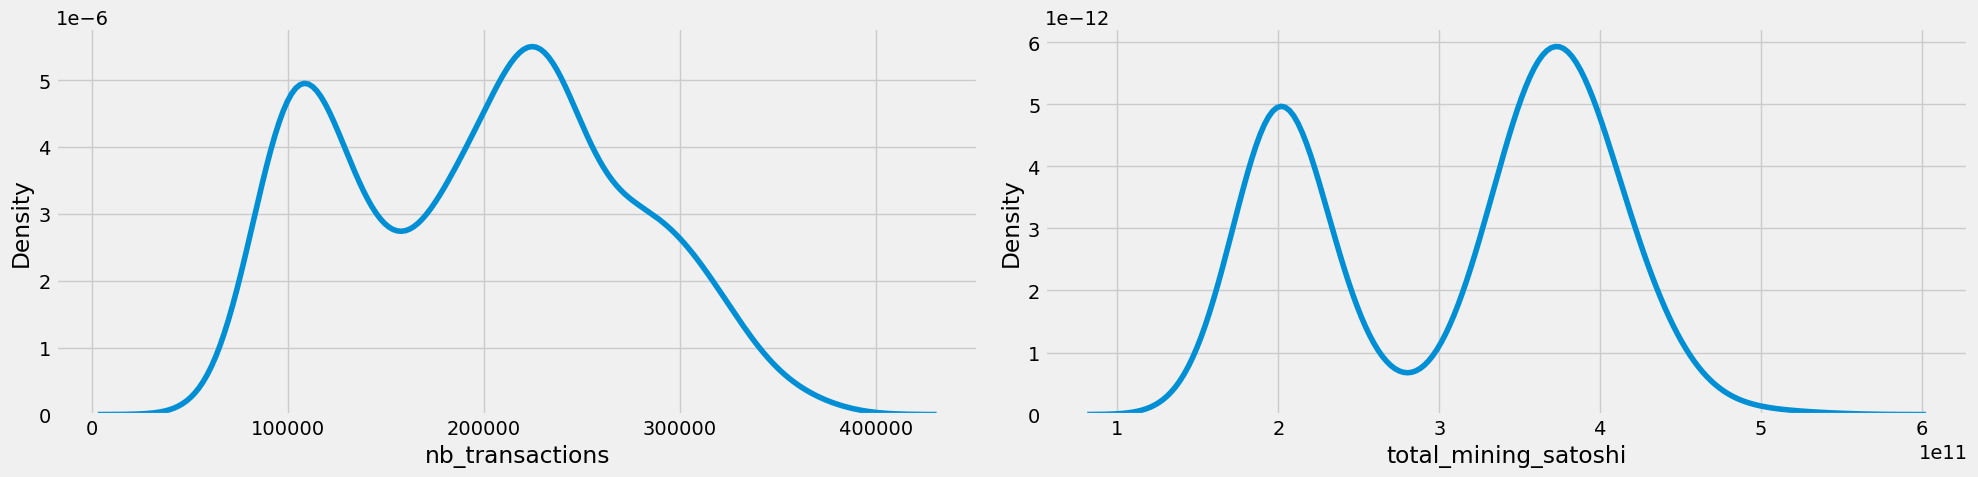

In [9]:
plt.rcParams["figure.figsize"] = [20, 5]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,2)
sns.kdeplot(global_data['nb_transactions'], ax=ax[0])
sns.kdeplot(global_data['total_mining_satoshi'], ax=ax[1])

Text(0.5, 1.0, 'Transactions per day')

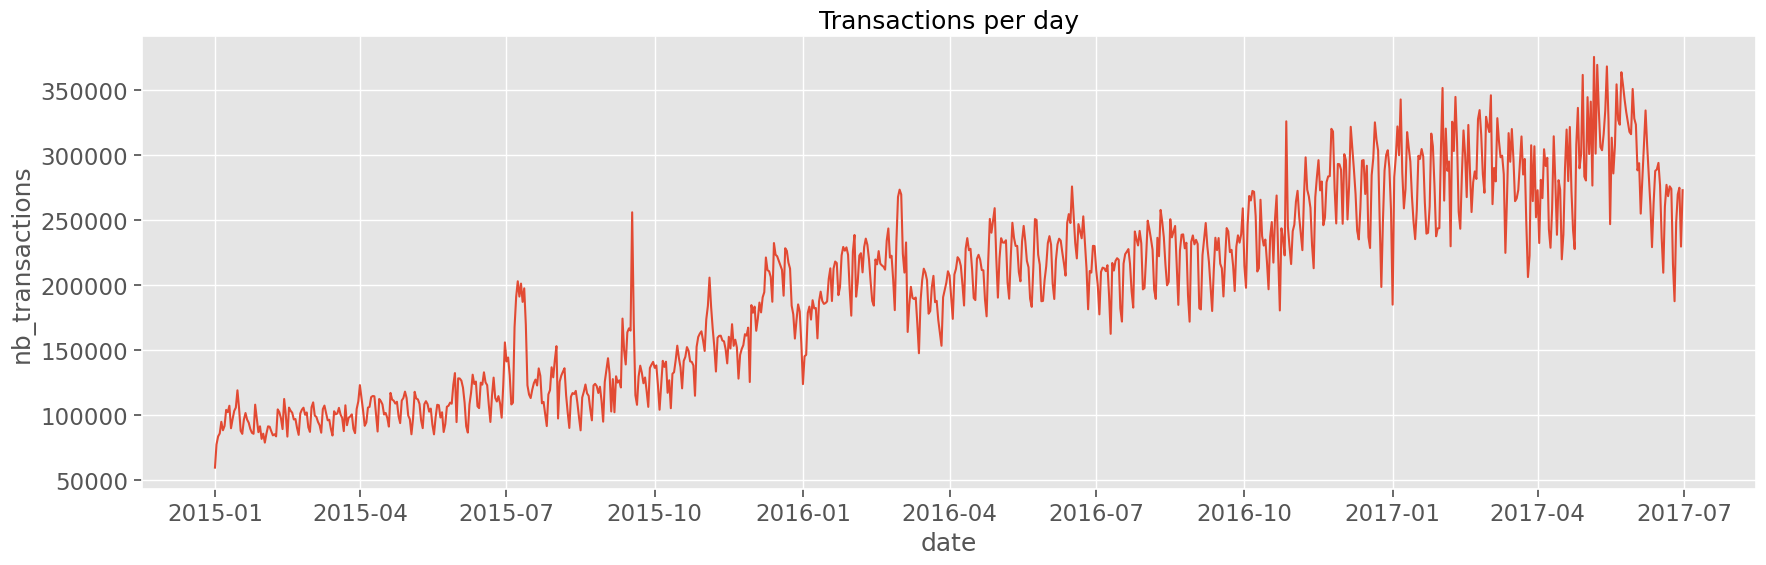

In [10]:
plt.style.use('ggplot')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})

g = plt.subplots(figsize=(18, 6))
g = sns.lineplot(x='date', y='nb_transactions', data=global_data)
plt.title('Transactions per day')

Text(0.5, 1.0, 'Transactions per day')

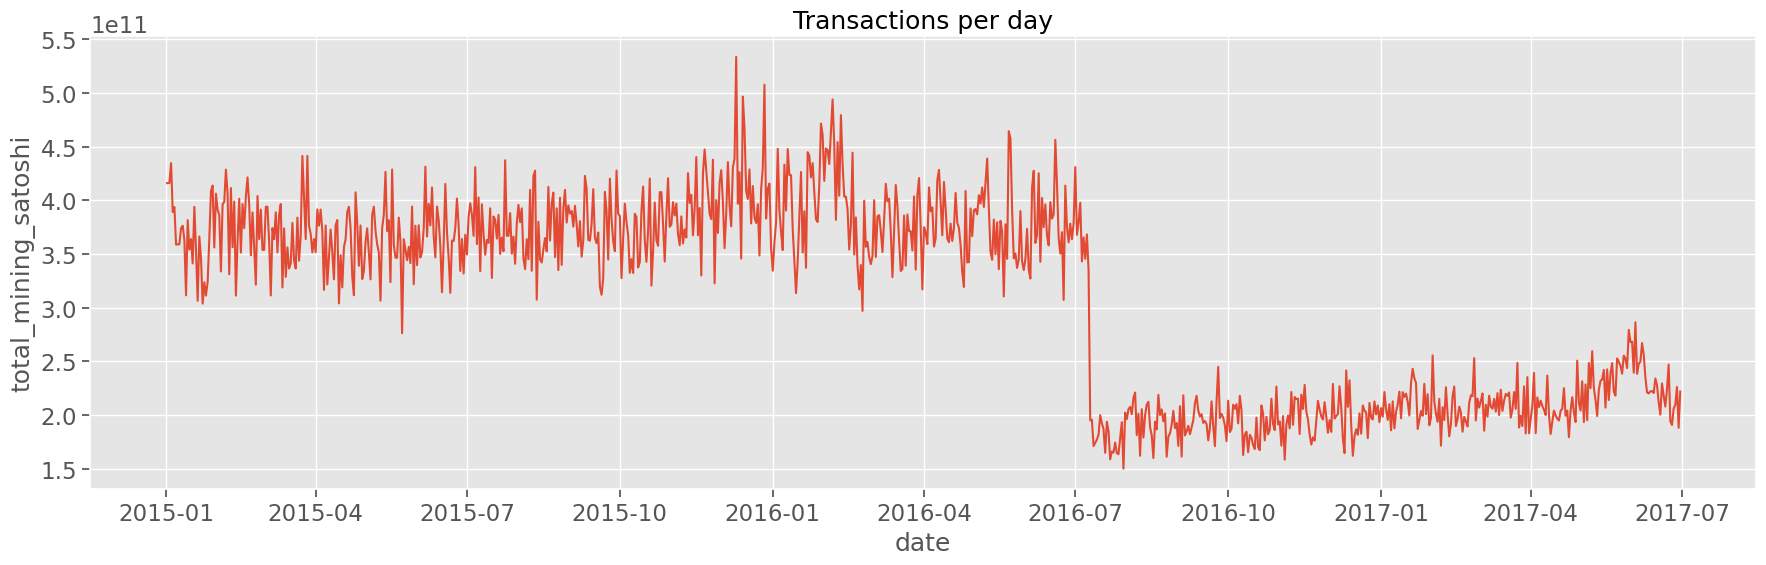

In [11]:
plt.style.use('ggplot')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})

g = plt.subplots(figsize=(18, 6))
g = sns.lineplot(x='date', y='total_mining_satoshi', data=global_data)
plt.title('Transactions per day')

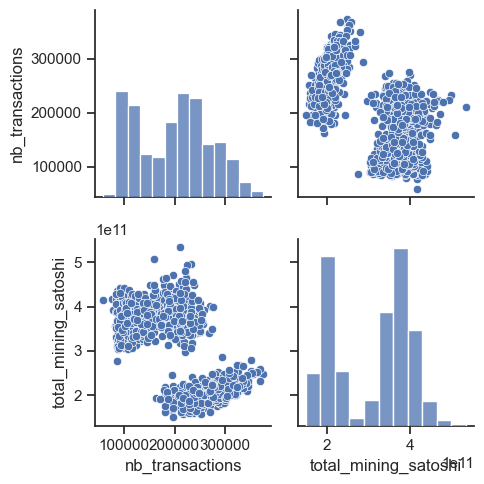

In [12]:
# check the relation among the features of data
sns.set(style="ticks")
sns.pairplot(global_data)

In [13]:
# select the three most important features (Transactions, Blocks, Output Satoshis) from the data
data = global_data[['total_mining_satoshi','nb_transactions']]
outliers_fraction=0.05
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

# train isolation forest
model = IsolationForest(contamination=outliers_fraction)
model.fit(data)

IsolationForest(contamination=0.05)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0.92, 'Transactions vs Satoshis: Red represents Anomalies')

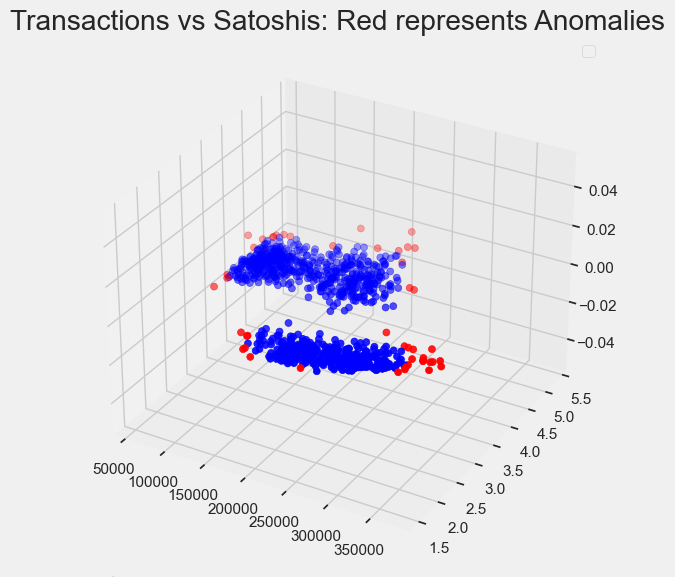

In [18]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111,projection='3d')
X = global_data.iloc[:,1:3].values
colors = np.array(['red', 'blue'])
y_pred = model.fit_predict(data)
ax.scatter(X[:, 0], X[:, 1], s=25, color=colors[(y_pred + 1) // 2] )
ax.legend()
#plt.xlabel('Transactions')
#plt.ylabel('Blocks')
#plt.zlabel('Sum of Output Satoshis')
plt.title('Transactions vs Satoshis: Red represents Anomalies')



In [19]:
# create a new column for storing the results of Isolation Forest method
global_data['anomaly_IsolationForest'] = pd.Series(model.predict(data))
global_data['anomaly_IsolationForest'] = global_data['anomaly_IsolationForest'].apply(lambda x: x == -1)
global_data['anomaly_IsolationForest'] = global_data['anomaly_IsolationForest'].astype(int)
global_data['anomaly_IsolationForest'].value_counts()

0    866
1     46
Name: anomaly_IsolationForest, dtype: int64

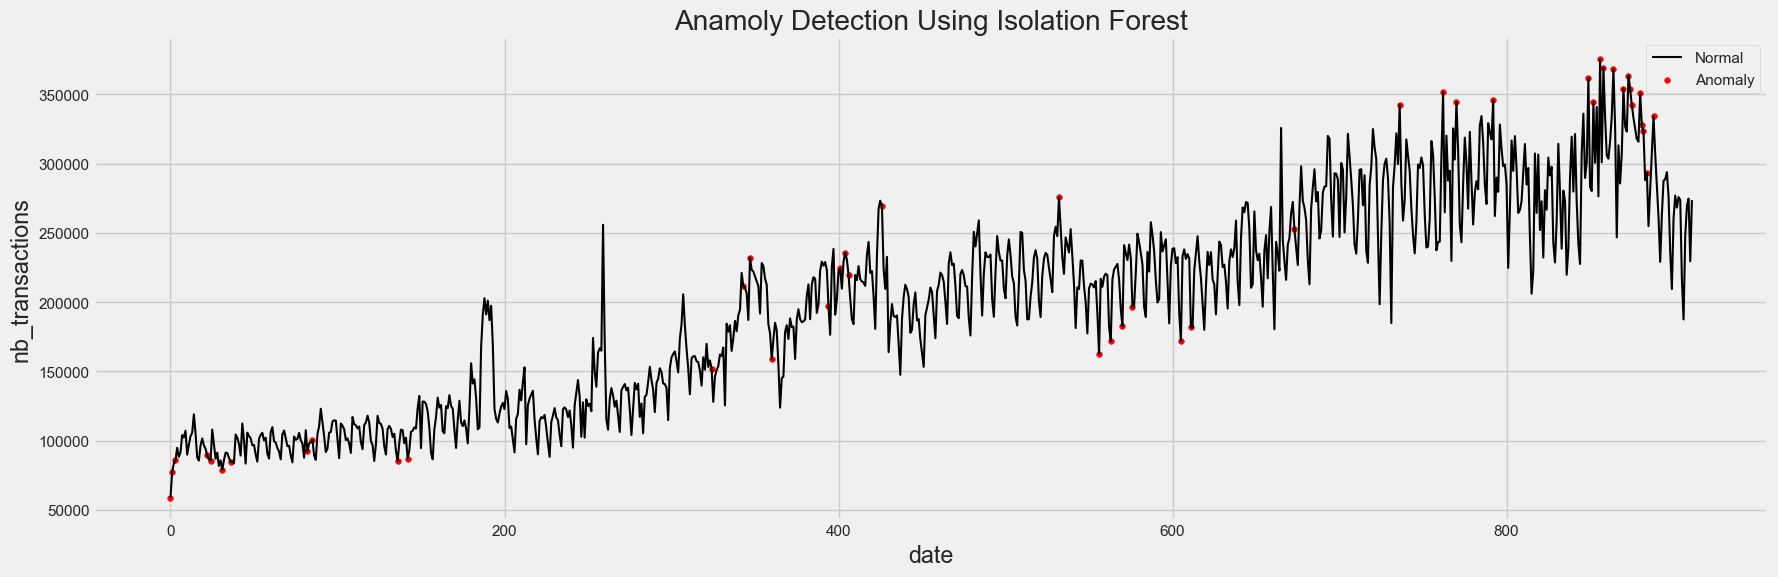

In [23]:
fig, ax = plt.subplots(figsize=(18,6))

#anomaly
a = global_data.loc[global_data['anomaly_IsolationForest'] == 1]
ax.plot(global_data['nb_transactions'], color='black', label = 'Normal', linewidth=1.5)
ax.scatter(a.index ,a['nb_transactions'], color='red', label = 'Anomaly', s=16)
plt.legend()
plt.title("Anamoly Detection Using Isolation Forest")
plt.xlabel('date')
plt.ylabel('nb_transactions')
plt.show();

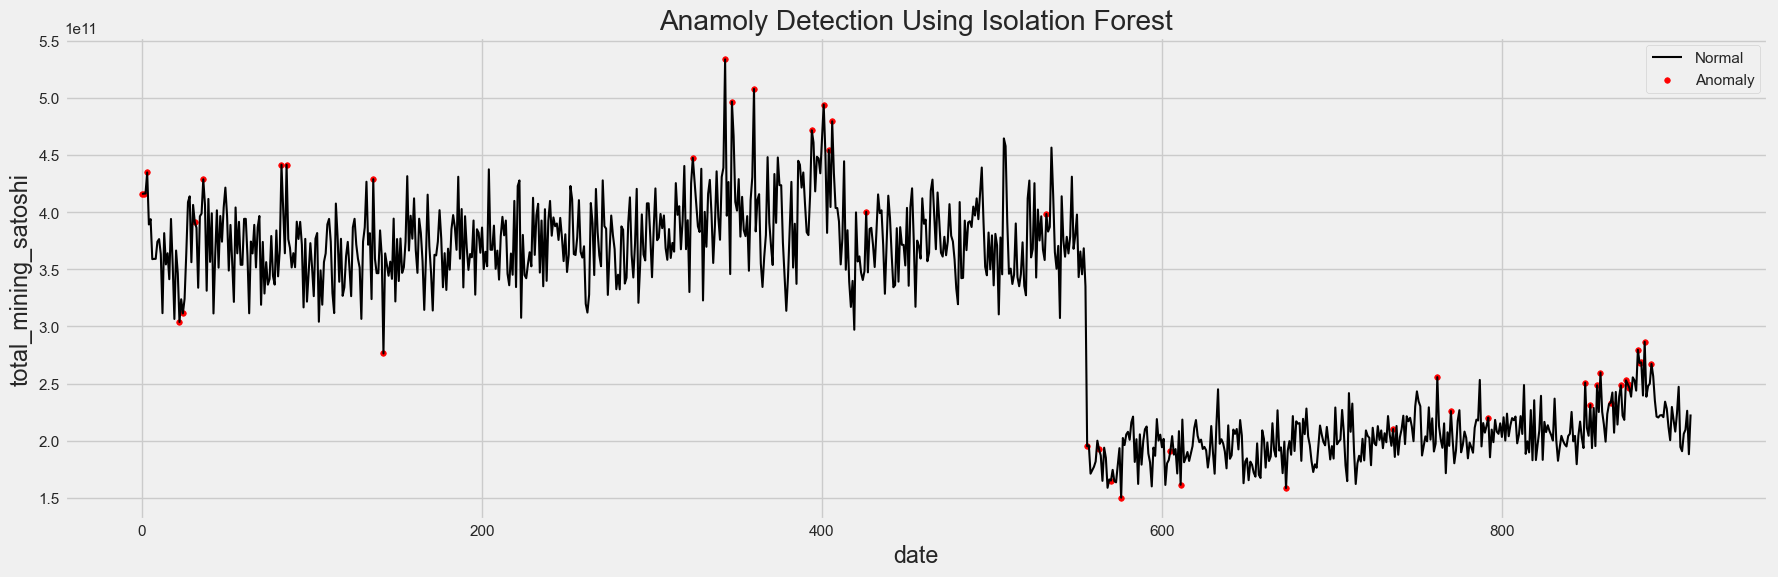

In [24]:
fig, ax = plt.subplots(figsize=(18,6))

#anomaly
a = global_data.loc[global_data['anomaly_IsolationForest'] == 1]
ax.plot(global_data['total_mining_satoshi'], color='black', label = 'Normal', linewidth=1.5)
ax.scatter(a.index ,a['total_mining_satoshi'], color='red', label = 'Anomaly', s=16)
plt.legend()
plt.title("Anamoly Detection Using Isolation Forest")
plt.xlabel('date')
plt.ylabel('total_mining_satoshi')
plt.show();